In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202011/scripts/trials/QA/DwSampler/AutoEmbedding


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..', '..', '..', '..','functions', 'QA'))

In [4]:
import QA_DwaveSampler_AutoEmbedding as qda
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../../../../../input/ost20.csv', sep=',')
print('20 bit datasets t1:', np.dot(df['Y'], df['LI']))

20 bit datasets t1: 8


In [6]:
t_list = qda.calc_marginals(df)

In [7]:
bqm = qda.make_Hamiltonian(df)

In [8]:
import timeit
time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)

In [9]:
n = 100
num_reads = 100
chain_strength = 11

In [10]:
QDA = qda.QA_DSampler_AEmbedding(df, chain_strength, num_reads, t_list, bqm, n, time_once)

In [11]:
#for x in dir(QDA):
#    print (x, ':', type(eval("QDA."+x)))

In [12]:
valid_y_info_list, valid_y_num = QDA.find_valid_y_ntimes()

In [13]:
#'sample', 'energy', 'num_occurrences', 'chain_break_fraction'
valid_y_info_list

[[[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1], 0.0, 1, 0.0],
 [[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], 0.0, 1, 0.0],
 [[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], 0.0, 1, 0.0],
 [[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], 0.0, 1, 0.0],
 [[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1], 0.0, 1, 0.0],
 [[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], 0.0, 1, 0.0],
 [[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], 0.0, 1, 0.0],
 [[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], 0.0, 1, 0.0],
 [[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1], 0.0, 1, 0.0],
 [[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], 0.0, 1, 0.0],
 [[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], 0.0, 1, 0.0],
 [[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], 0.0, 1, 0.0],
 [[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], 

In [14]:
len(valid_y_info_list)

891

In [15]:
valid_y_num

891

In [17]:
plot_path = '../../../../../output/QA/DwSamplerAutoEmbed_20bit_n100_num100_strength11_occurance_hist'
occurance_list = QDA.occurance_hist(valid_y_info_list,　plot_path)

SyntaxError: invalid character in identifier (<ipython-input-17-4405ebdce645>, line 2)

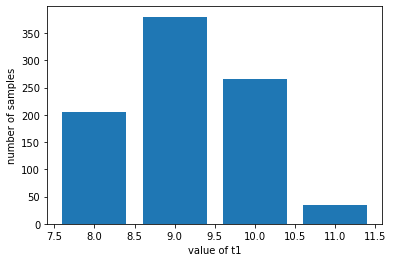

In [14]:
plot_path = '../../../../../output/QA/DwSamplerAutoEmbed_20bit_n100_num100_strength11_t1_hist'
hist_dic = QDA.y_num_t1_hist(valid_y_info_list, plot_path)

In [15]:
hist_dic

{9: 380, 8: 205, 10: 265, 11: 34}

In [16]:
sum(hist_dic.values())

884

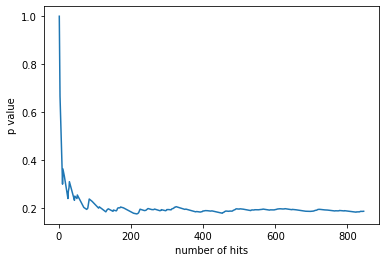

In [17]:
output_path = '../../../../../output/QA/DwSamplerAutoEmbed_20bit_n100_num100_strength11_p_value_transition'
valid_y_num, valid_y_list, p_dic = QDA.p_value_transition(valid_y_info_list, output_path) 

In [18]:
QDA.time_measurement()

0.007529930999999877

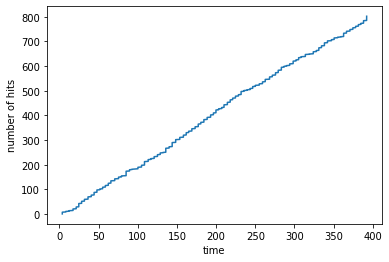

In [20]:
path = '../../../../../output/QA/DSampler_AEmbed_20bit_time_num'
valid_y_list, valid_y_num_list, time_list = QDA.time_num_y(path)